# **Week 12. Homework 8. Pandas**



---



---



---




1. Load the dataset into a pandas DataFrame and display the first few rows.

In [44]:
import seaborn as sb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [74]:
start=pd.read_csv("startups.csv", na_values=[0])

start.head(3)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39




---



---




2. Find the number of rows and columns in the dataset.




In [46]:
start.shape

(50, 5)




---


---



3. Check for missing values in each column and handle them appropriately.




In [77]:
print(start.isnull().sum())

R&D Spend          2
Administration     0
Marketing Spend    3
State              0
Profit             0
dtype: int64


In [78]:
start['R&D Spend'].fillna(start['R&D Spend'].mean())
start['Marketing Spend'].fillna(start['Marketing Spend'].mean())

start.head(3)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39





---


---



4. Calculate the mean, median, and standard deviation of the 'R&D_Spend' column.



In [48]:
mean=start['R&D Spend'].mean()
med=start['R&D Spend'].median()
std=start['R&D Spend'].std()

print(mean)
print(med)
print(std)

73721.6156
73051.08
45902.25648230753





---


---



5. Filter and create a new DataFrame containing companies located in a **California**.



In [49]:
cali=start[(start.State=='California')]

print(cali)

    R&D Spend  Administration  Marketing Spend       State     Profit
1   162597.70       151377.59        443898.53  California  191792.06
6   134615.46       147198.87        127716.82  California  156122.51
9   123334.88       108679.17        304981.62  California  149759.96
11  100671.96        91790.61        249744.55  California  144259.40
13   91992.39       135495.07        252664.93  California  134307.35
16   78013.11       121597.55        264346.06  California  126992.93
20   76253.86       113867.30        298664.47  California  118474.03
25   64664.71       139553.16        137962.62  California  107404.34
32   63408.86       129219.61         46085.25  California   97427.84
34   46426.07       157693.92        210797.67  California   96712.80
37   44069.95        51283.14        197029.42  California   89949.14
39   38558.51        82982.09        174999.30  California   81005.76
40   28754.33       118546.05        172795.67  California   78239.91
42   23640.93       




---


---



6. Sort the dataset by 'Profit' in descending order.



In [50]:
profit=start.sort_values('Profit', ascending=False)

profit.head(10)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96





---


---



7. Group the data by 'State' and calculate the total 'Profit' for each state.



In [71]:
total_profit=start.groupby('State').agg({'Profit':"sum"}).reset_index()

total_profit

,State,Profit
0,California,1766387.98
1,Florida,1900384.39
2,New York,1933859.59





---


---



8. Create a bar chart to visualize the total 'Profit' by 'State.'



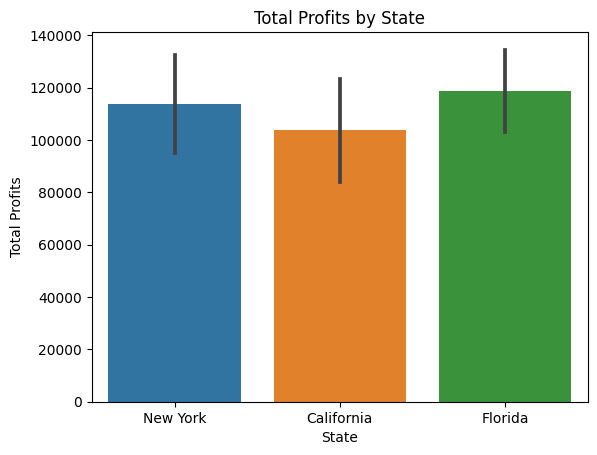

In [73]:
sb.barplot(x='State', y='Profit', data=start)
plt.xlabel("State")
plt.ylabel("Total Profits")
plt.title("Total Profits by State")
plt.show()




---


---



9. Calculate the correlation between 'R&D_Spend' and 'Profit.'



In [81]:
corr=start.corr(method='pearson', min_periods=1, numeric_only=True)

corr

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.269749,0.708253,0.977401
Administration,0.269749,1.000000,-0.076943,0.200717
Marketing Spend,0.708253,-0.076943,1.000000,0.747434
Profit,0.977401,0.200717,0.747434,1.000000




---



---



---



10. Create a new column 'Total_Spend' that represents the sum of 'R&D_Spend,' 'Administration,' and 'Marketing_Spend' for each company.



In [52]:
start["Total_Spend"]=((start["R&D Spend"])+(start['Administration'])+(start['Marketing Spend']))

start.head(5)

,R&D Spend,Administration,Marketing Spend,State,Profit,Total_Spend
0,165349.20,136897.80,471784.10,New York,192261.83,774031.10
1,162597.70,151377.59,443898.53,California,191792.06,757873.82
2,153441.51,101145.55,407934.54,Florida,191050.39,662521.60
3,144372.41,118671.85,383199.62,New York,182901.99,646243.88
4,142107.34,91391.77,366168.42,Florida,166187.94,599667.53


11. Calculate the average **R&D_Spend**, **Administration**, and **Marketing_Spend** for companies located in each **State**



In [53]:
means=start.groupby('State').agg({'Profit':"mean",
                                  'Administration':"mean",
                                  'Marketing Spend':"mean"}).reset_index()
means


,State,Profit,Administration,Marketing Spend
0,California,103905.175294,120746.507059,182540.929412
1,Florida,118774.024375,121768.897500,247323.551250
2,New York,113756.446471,121543.470588,205346.015882




---



---



12. Create a histogram to visualize the distribution of 'Profit.'



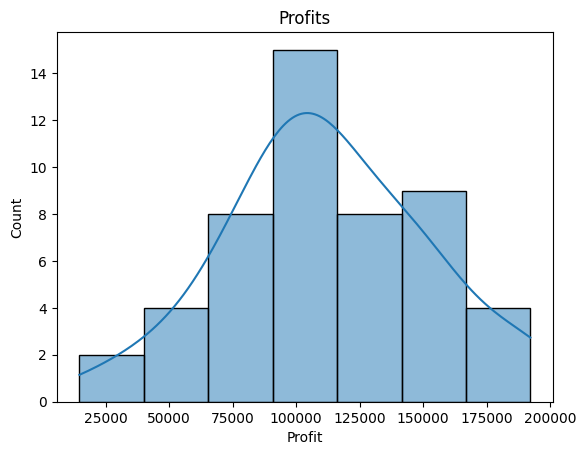

In [68]:
sb.histplot(start["Profit"], kde=True)
plt.xlabel("Profit")
plt.title("Profits")
plt.show()



---



---



13. Filter the dataset to include only companies with 'R&D_Spend' greater than a 12000.



In [54]:
spending=start[start['R&D Spend']>12000]

spending.head(10)

,R&D Spend,Administration,Marketing Spend,State,Profit,Total_Spend
0,165349.20,136897.80,471784.10,New York,192261.83,774031.10
1,162597.70,151377.59,443898.53,California,191792.06,757873.82
2,153441.51,101145.55,407934.54,Florida,191050.39,662521.60
3,144372.41,118671.85,383199.62,New York,182901.99,646243.88
4,142107.34,91391.77,366168.42,Florida,166187.94,599667.53
5,131876.90,99814.71,362861.36,New York,156991.12,594552.97
6,134615.46,147198.87,127716.82,California,156122.51,409531.15
7,130298.13,145530.06,323876.68,Florida,155752.60,599704.87
8,120542.52,148718.95,311613.29,New York,152211.77,580874.76
9,123334.88,108679.17,304981.62,California,149759.96,536995.67




---



---



14. Calculate the total 'Profit' for companies with 'Marketing_Spend' above a certain threshold.



In [55]:
totals=start[(start['Profit']>150000)&(start["Marketing Spend"]>300000)]

totals

,R&D Spend,Administration,Marketing Spend,State,Profit,Total_Spend
0,165349.20,136897.80,471784.10,New York,192261.83,774031.10
1,162597.70,151377.59,443898.53,California,191792.06,757873.82
2,153441.51,101145.55,407934.54,Florida,191050.39,662521.60
3,144372.41,118671.85,383199.62,New York,182901.99,646243.88
4,142107.34,91391.77,366168.42,Florida,166187.94,599667.53
5,131876.90,99814.71,362861.36,New York,156991.12,594552.97
7,130298.13,145530.06,323876.68,Florida,155752.60,599704.87
8,120542.52,148718.95,311613.29,New York,152211.77,580874.76


15. Replace any missing values in the 'Marketing_Spend' column with the mean spending of the dataset.



In [79]:
start['Marketing Spend'].fillna(start['Marketing Spend'].mean())


0     471784.100000
1     443898.530000
2     407934.540000
3     383199.620000
4     366168.420000
5     362861.360000
6     127716.820000
7     323876.680000
8     311613.290000
9     304981.620000
10    229160.950000
11    249744.550000
12    249839.440000
13    252664.930000
14    256512.920000
15    261776.230000
16    264346.060000
17    282574.310000
18    294919.570000
19    224494.784894
20    298664.470000
21    299737.290000
22    303319.260000
23    304768.730000
24    140574.810000
25    137962.620000
26    134050.070000
27    353183.810000
28    118148.200000
29    107138.380000
30     91131.240000
31     88218.230000
32     46085.250000
33    214634.810000
34    210797.670000
35    205517.640000
36    201126.820000
37    197029.420000
38    185265.100000
39    174999.300000
40    172795.670000
41    164470.710000
42    148001.110000
43     35534.170000
44     28334.720000
45      1903.930000
46    297114.460000
47    224494.784894
48    224494.784894
49     45173.060000





---


---



16. Create a new column 'Profit_Margin' that represents the profit margin for each company (Profit / Total_Spend).



In [57]:
start.head(3)

,R&D Spend,Administration,Marketing Spend,State,Profit,Total_Spend
0,165349.20,136897.80,471784.10,New York,192261.83,774031.10
1,162597.70,151377.59,443898.53,California,191792.06,757873.82
2,153441.51,101145.55,407934.54,Florida,191050.39,662521.60


In [61]:
start['profit_margin']=(start['Profit'])/(start["Total_Spend"])

start.head(3)

,R&D Spend,Administration,Marketing Spend,State,Profit,Total_Spend,profit_margin
0,165349.20,136897.80,471784.10,New York,192261.83,774031.10,0.248390
1,162597.70,151377.59,443898.53,California,191792.06,757873.82,0.253066
2,153441.51,101145.55,407934.54,Florida,191050.39,662521.60,0.288369




---



---



---



17. Sort the dataset by 'Profit_Margin' in descending order.



In [62]:
start.sort_values("profit_margin", ascending=False, inplace=True)

start.head(5)


,R&D Spend,Administration,Marketing Spend,State,Profit,Total_Spend,profit_margin
48,542.05,51743.15,0.00,New York,35673.41,52285.20,0.682285
19,86419.70,153514.11,0.00,New York,122776.86,239933.81,0.511711
45,1000.23,124153.04,1903.93,New York,64926.08,127057.20,0.510999
32,63408.86,129219.61,46085.25,California,97427.84,238713.72,0.408137
43,15505.73,127382.30,35534.17,New York,69758.98,178422.20,0.390977




---



---



18. Calculate the average profit margin for companies in each 'State' and create a bar chart to display it.



In [64]:
profits_by_state=start.groupby('State').agg({'profit_margin':"mean"}).reset_index()

profits_by_state

,State,profit_margin
0,California,0.282640
1,Florida,0.266745
2,New York,0.330249


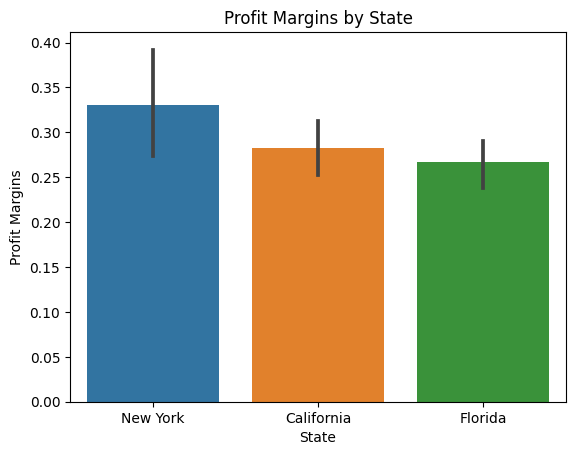

In [67]:
sb.barplot(x='State', y='profit_margin', data=start)
plt.xlabel("State")
plt.ylabel("Profit Margins")
plt.title("Profit Margins by State")
plt.show()



---



---



---



19. Find the maximum 'R&D_Spend' in each **State**.



In [66]:
maximum=start.groupby('State').agg({'R&D Spend': "max"})

maximum

,R&D Spend
State,
California,162597.70
Florida,153441.51
New York,165349.20
